In [1]:
import pandas as pd
import numpy as np
import os

from bs4 import BeautifulSoup
import pandas as pd

import time
from requests import Session
import sys 
import re
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
#from bertopic.vectorizers import ClassTfidfTransformer
#from bertopic.dimensionality import BaseDimensionalityReduction
from sklearn.linear_model import LogisticRegression
#from bertopic.backend import WordDocEmbedder

import gensim.downloader as api
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import TfidfModel
from gensim.similarities import WordEmbeddingSimilarityIndex

from re import sub
from multiprocessing import cpu_count

from gensim.similarities import SparseTermSimilarityMatrix
from gensim.similarities import SoftCosineSimilarity

from xgboost import XGBClassifier
import argparse
from keybert import KeyBERT
from sklearn.metrics.pairwise import cosine_similarity

from autocorrect import Speller
import tldextract

from itertools import combinations
from nltk import skipgrams
#import umap

import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib as mpl
from pylab import rcParams
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_theme(style='white')
#% matplotlib inline
from datetime import datetime

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

from textblob import TextBlob, Word, Blobber
from textblob.classifiers import NaiveBayesClassifier
from textblob.taggers import NLTKTagger
#from bertopic.vectorizers import ClassTfidfTransformer

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
nltk.download('maxent_ne_chunker')
nltk.download('words')

#import spacy
#nlp = spacy.load('en_core_web_sm')

from gensim.models import word2vec
import pickle
import gzip
import argparse
import torch
from transformers import BertTokenizer, BertModel
#from bertopic.representation import KeyBERTInspired
#from bertopic.representation import MaximalMarginalRelevance
#from bertopic.representation import PartOfSpeech

#import dgl

import string
import gensim
import collections
from gensim.corpora import Dictionary
import difflib 
from matplotlib_venn import venn3
from venn import venn
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
tqdm.pandas(desc="progress-bar")

from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
#from bertopic import BERTopic
#import openai
#from bertopic.representation import OpenAI
from sentence_transformers import SentenceTransformer
#import hdbscan

from autocorrect import Speller
from itertools import combinations
from nltk import skipgrams

from bs4 import BeautifulSoup
import requests
import csv
import time

import itertools
import collections
import re
import logging
from re import sub


# Import and download stopwords from NLTK.
nltk.download('stopwords')  # Download stopwords list.
stopwords = set(nltk.corpus.stopwords.words("english"))

import networkx as nx
from networkx.algorithms.community.centrality import girvan_newman
from itertools import chain

import ipywidgets as widgets
from IPython.display import clear_output, display
#from top2vec import Top2Vec

import string
import gc
import warnings
warnings.filterwarnings('ignore')
import logging

# Initialize logging.
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.WARNING)  # DEBUG # INFO

c:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ad882\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ad882\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ad882\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ad882\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Function to reverse the names of the authors in the naming list for each databases
# this is because they are included in the dataset differently

def rev_author_names(x):
    names = ''
    for key, value in enumerate(x):
        value = value.split(" ")
        first = str(value[0])
        second = str(" ".join(value[1:]))
        name = second + ' ' + first
        names = "; ".join([names, name]).lstrip().lstrip(';')
    return names

string = 'Ritesh Kumar, Enakshi Nandi Roy'
test = "".join(rev_author_names(string.split(", ")))
test

'Kumar Ritesh; Nandi Roy Enakshi'

In [3]:
# Only keeping the surname of the author and the initials of the first and middle names

def init_auth_names(x):
    names = ''
    for key, value in enumerate(x):
        value = value.strip().split(" ")
        initials = value[:-1]
        surname = value[-1]
        words = ''
        for each in initials:
            each = each.capitalize()
            each = each[0]
            each = str(each) + '.'
            words = " ".join([words, each])
        name = words + ' ' + surname
        names = ";".join([names, name]).strip().lstrip(';')
    return names

string = 'Hendrik Burwinkel; Matthias ok Keicher; D. Jok Bani-Harouni; T. Zellner; F. Eyer; N. Navab'
test = "".join(init_auth_names(string.split("; ")))
test

'H. Burwinkel; M. O. Keicher; D. J. Bani-Harouni; T. Zellner; F. Eyer; N. Navab'

In [4]:
def add_space_auth(x):
    names = ''
    for key, value in enumerate(x):
        value = value.split(" ")
        first = str(value[0])
        second = str(" ".join(value[1:]))
        second = second.replace('.', '. ').rstrip()
        name = first + ' ' + second
        names = "; ".join([names, name]).lstrip().lstrip(';')
    return names

string = 'Ta H.T.; Rahman A.B.S.; Najjar L.; Gelbukh A.'

test = "".join(add_space_auth(string.split("; ")))
test

'Ta H. T.; Rahman A. B. S.; Najjar L.; Gelbukh A.'

In [5]:
######################### ArXiv ###########################

df1 = pd.read_csv('arxiv_data.csv')

# Removing the nan values
df1[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']] = df1[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].fillna('')

# Merging all the columns together for the authors
df1['authors'] = df1[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].astype(str).apply(lambda x: '; '.join(x), axis=1)
# removing trailing commas and extra spaces
df1['authors'] = df1['authors'].apply(lambda x: x.rstrip('; '))
df1['authors'] = df1['authors'].apply(lambda x: "".join(init_auth_names(x.split("; "))))

df1 = df1[df1['Title'].notna()]
df1 = df1[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]

In [6]:
### Elsevier ###########################

df2 = pd.read_csv('elsevier_data.csv')

# Has TLDR which is not useful for the analysis anyway

# Removing the word abstract in various forms
df2['Abstract'] = df2['Abstract'].astype(str).apply(lambda x: re.sub(r'^ABSTRACT ', '', x))
df2['Abstract'] = df2['Abstract'].astype(str).apply(lambda x: re.sub(r'^ABSTRACT. ', '', x))
df2['Abstract'] = df2['Abstract'].astype(str).apply(lambda x: re.sub(r'^Abstract ', '', x))

# Removing the nan values
df2[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']] = df2[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].fillna('')

# Merging all the columns together for the authors
df2['authors'] = df2[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].astype(str).apply(lambda x: '; '.join(x), axis=1)
# removing trailing commas and extra spaces
df2['authors'] = df2['authors'].apply(lambda x: x.rstrip('; '))
df2['authors'] = df2['authors'].apply(lambda x: "".join(init_auth_names(x.split("; "))))
df2 = df2[df2['Title'].notna()]

df2 = df2[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]

In [7]:
### Google Scholar ###########################

df3 = pd.read_csv('gscholar_data.csv')

### Work on the abstracts first

# Has TLDR which is useful, and might be worth replacing it in place of the abstract
df3['Abstract'] = df3['Abstract'].fillna(df3.pop('TLDR'))

# Now remove the word 'ABSTRACT' from some of them
df3['Abstract'] = df3['Abstract'].astype(str).apply(lambda x: re.sub(r'^ABSTRACT ', '', x))

# Removing the nan values
df3[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']] = df3[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].fillna('')

# Merging all the columns together for the authors
df3['authors'] = df3[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].astype(str).apply(lambda x: '; '.join(x), axis=1)
# removing trailing commas and extra spaces
df3['authors'] = df3['authors'].apply(lambda x: x.rstrip('; '))
df3['authors'] = df3['authors'].apply(lambda x: "".join(init_auth_names(x.split("; "))))

# Changing the name of the 'title' column to match with others
df3 = df3.rename(columns={'title': 'Title'})
df3 = df3[df3['Title'].notna()]

# Convert the year from float to int
df3['Year'] = df3['Year'].apply(lambda x: np.array(x, dtype=int))

df3 = df3[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]



In [8]:
### Scopus ###########################

df4_1 = pd.read_csv('scopus_cs.csv')
df4_1['fieldsOfStudy'] = 'Computer Science'

df4_2 = pd.read_csv('scopus_ah.csv')
df4_2['fieldsOfStudy'] = 'Arts and Humanities'

df4_3 = pd.read_csv('scopus_ds.csv')
df4_3['fieldsOfStudy'] = 'Decision Sciences'

df4_4 = pd.read_csv('scopus_engg.csv')
df4_4['fieldsOfStudy'] = 'Engineering'

df4_5 = pd.read_csv('scopus_multidisc.csv')
df4_5['fieldsOfStudy'] = 'Multidisciplinary'

df4_6 = pd.read_csv('scopus_psychology.csv')
df4_6['fieldsOfStudy'] = 'Psychology'

df4_7 = pd.read_csv('scopus_social_science.csv')
df4_7['fieldsOfStudy'] = 'Social Sciences'

df4_8 = pd.read_csv('scopus_maths.csv')
df4_8['fieldsOfStudy'] = 'Mathematics'

df4 = pd.concat([df4_1, df4_2, df4_3, df4_4, df4_5, df4_6, df4_7, df4_8], axis=0)


# Merging all the columns together for the authors
#df4['authors'] = df4[['author_1_name', 'author_2_name', 'author_3_name', 'author_4_name', 'author_5_name', 'author_6_name']].astype(str).apply(lambda x: ', '.join(x), axis=1)
# removing trailing commas and extra spaces
df4['Authors'] = df4['Authors'].apply(lambda x: "".join(add_space_auth(str(x).split("; "))))
df4['Authors'] = df4['Authors'].apply(lambda x: "".join(rev_author_names(x.split("; "))))

df4['Open_Access'] = np.where(df4['Open Access'].isna(), False, True)

df4 = df4.rename(columns={'title': 'Title', 'Authors': 'authors', 'Document Type': 'Publication_Type', 'Source title': 'Venue'})
#df4 = df4[df4['Title'].notna()]

df4['Year'] = df4['Year'].apply(lambda x: np.array(x, dtype=int))

df4 = df4[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]

df4['Publication_Type'].unique() # Article', 'Conference Paper', 'Review', 'Book', 'Conference Review', 'Book Chapter', 'Data Paper'
df4['Publication_Type'] = np.where(df4['Publication_Type'] == 'Conference Paper', 'Conference', df4['Publication_Type'])
df4['Publication_Type'] = np.where(df4['Publication_Type'] == 'Conference Review', 'Conference, Review', df4['Publication_Type'])
df4['Publication_Type'] = np.where(df4['Publication_Type'] == 'Book Chapter', 'Book', df4['Publication_Type'])
df4['Publication_Type'] = np.where(df4['Publication_Type'] == 'Data Paper', 'Study', df4['Publication_Type'])
df4['Publication_Type'] = np.where(df4['Publication_Type'] == 'Article', 'JournalArticle', df4['Publication_Type'])



In [9]:
### Semantic Scholar ###########################

df5 = pd.read_csv('sem_sco_data.csv')

df5 = df5.rename(columns={'title': 'Title', 'all_authors': 'authors', 'isOpenAccess': 'Open_Access', 'venue': 'Venue', 'abstract': 'Abstract', 'year': 'Year'})
df5 = df5[df5['Title'].notna()]

# Convert the year from float to int
#df5['Year'] = df5['Year'].apply(lambda x: np.array(x, dtype=int))

df5['authors'] = df5['authors'].apply(lambda x: "".join(init_auth_names(str(x).split(", "))))

len(df5['book_title'].unique()), len(df5['journal'].unique()), len(df5) # (1562, 1663, 9900)

# Checking if values can exist in both, neither or either
df5[['book_title', 'journal']].isnull().sum(axis=1).unique() # array([0, 1, 2])

df5['Publication_Type_1'] = np.where(df5['book_title'].isna(), '', 'Book')
df5['Publication_Type_2'] = np.where(df5['journal'].isna(), '', 'JournalArticle')

# join both of the columns and strip the space and comma from there
df5['Publication_Type'] = df5[['Publication_Type_2', 'Publication_Type_1']].apply(lambda x: ', '.join(x).rstrip(", ").lstrip(", "), axis=1)
df5['Publication_Type'] = df5['Publication_Type'].replace('', np.nan, regex=True)

df5 = df5[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]


In [10]:
### Web of Science ###########################

df6 = pd.read_csv('wos_data.csv')

df6['Author Full Names'] = df6['Author Full Names'].apply(lambda x: "; ".join(x.replace(',', '').split('; ')))

df6['Publication Type'] = np.where((df6['Publication Type'] == 'J'), 'JournalArticle', df6['Publication Type'])
df6['Publication Type'] = np.where((df6['Publication Type'] == 'S'), 'JournalArticle, Book', df6['Publication Type'])
df6['Publication Type'] = np.where((df6['Publication Type'] == 'C'), 'Conference', df6['Publication Type'])

df6['Author Full Names'] = df6['Author Full Names'].apply(lambda x: "; ".join(x.replace(',', '').split('; ')))
df6['Author Full Names'] = df6['Author Full Names'].apply(lambda x: "".join(rev_author_names(x.split("; "))))
df6['Author Full Names'] = df6['Author Full Names'].apply(lambda x: "".join(init_auth_names(x.split("; ")))) 

df6 = df6.rename(columns={'Author Full Names': 'authors', 'Publication Type': 'Publication_Type', 'Article Title': 'Title', 
                          'Research Areas': 'fieldsOfStudy', 'Publication Year': 'Year', 'Conference Title': 'Venue'})
df6 = df6[df6['Title'].notna()]


df6['Open_Access'] = np.where(df6['Open Access Designations'].isna(), False, True)
df6['Publication_Type'] = np.where(df6['Document Type'].str.contains('Review'), 'Review', df6['Publication_Type'])
df6['Publication_Type'] = np.where(df6['Document Type'].str.contains('Meeting'), 'Study', df6['Publication_Type'])
df6['Publication_Type'] = np.where(df6['Document Type'] == 'Article; Proceedings Paper', 'JournalArticle, Conference', df6['Publication_Type'])
df6['Publication_Type'] = np.where(df6['Document Type'] == 'Article; Data Paper', 'JournalArticle, Study', df6['Publication_Type'])
df6['Publication_Type'] = np.where(df6['Document Type'] == 'Editorial Material', 'Editorial', df6['Publication_Type'])
df6['Publication_Type'] = np.where(df6['Document Type'] == 'Letter', 'LettersAndComments', df6['Publication_Type'])

df6['Publication_Type'].unique() # Publication Type (J=Journal; B=Book; S=Series; P=Patent)

df6 = df6[['Title', 'Abstract', 'Venue', 'Year', 'Open_Access', 'fieldsOfStudy', 'Publication_Type', 'authors']]


In [11]:
# Combining all of the dataframes
df = pd.concat([df1, df2], ignore_index=True)
df = pd.concat([df, df3], ignore_index=True)
df = pd.concat([df, df4], ignore_index=True)
df = pd.concat([df, df5], ignore_index=True)
df = pd.concat([df, df6], ignore_index=True)

In [12]:
# Remove those articles which have no year values in them
df['Year'].isna().sum() # 101
df = df[~df['Year'].isna()] # 25551

# Open access
df = df[~df['Open_Access'].isna()] # 25551

# Removing those articles with no abstract
df = df[~df['Abstract'].isna()] # 23242

# Stripping newline ('\n') and tab ('\t') characters
# 
# removing from the start and end
df['Abstract'] = df['Abstract'].apply(lambda x: str(x).strip('\n'))
df['Abstract'] = df['Abstract'].apply(lambda x: str(x).strip('\t'))
# 
# removing them in the middle of the string 
df['Abstract'] = df['Abstract'].apply(lambda x: str(x).replace('\n',''))
df['Abstract'] = df['Abstract'].apply(lambda x: str(x).replace('\t',''))

# Remove characters from the beginning of the string if it does not start with a capital letter.
# This step is taken because many of the abstracts start with uncommon characters, which might later impact the methodologies taken
# e.g., '—Understanding human behavior... ' : here removing the '-' character is essential.
df['Abstract'] = df['Abstract'].apply(lambda x: x if re.search("^[A-Z]", x) else x[1:])
# removing whitespace and characters from beginning and end of each input
df['Abstract'] = df['Abstract'].apply(lambda x: x.lstrip().rstrip())

# Replacing empty strings with nan in abstracts
#df['Abstract'] = df['Abstract'].replace('', np.nan, inplace=True)
df = df[df['Abstract'] != ""] # 15161

# Remove values with no authors
df = df[~df['authors'].isna()]

# Checking how many of the publication types are missing
df['Publication_Type'].isna().sum() #1633

# Year
# change the year type to integer first 
df['Year'] = df['Year'].apply(lambda x: np.array(x, dtype=int))
df['Year'].unique() # returns a lot of irrelevant values, as years before 2012 are also there.count
# That needs to be removed
df = df[(df['Year'] > 2011) & (df['Year'] < 2023)] # 14980

# fieldsOfStudy
df = df[~df['fieldsOfStudy'].isna()] # 14863

# reset index
df = df.reset_index(drop=True)

len(df)

23310

In [13]:
# Create a list of disciplines which would be of interest for this study

comp_fields = ['Computer Science', 'Mathematics', 'Physics', 'Engineering',
               'Science & Technology']

soc_fields = ['Political Science', 'Psychology', 'Sociology', 'History', 'Philosophy', 'Psychiatry',
              'Arts and Humanities', 'Arts & Humanities', 'Social Sciences', 'Linguistics', 'Women\'s Studies',
              'Social Work', 'Behavioral Sciences', 'Ethnic Studies']

# Multidisciplinary & Decision Sciences

In [14]:
#df['Discipline'] = np.where(((df['fieldsOfStudy'].isin(comp_fields)) & (df['fieldsOfStudy'].isin(soc_fields))), 'Multidisciplinary', '') 
df['Discipline'] = df['fieldsOfStudy'].apply(lambda x: 'Multidisciplinary' if (any(y in x for y in comp_fields) & any(y in x for y in soc_fields)) else '')

df['Discipline'] = np.where(((df['fieldsOfStudy'].isin(comp_fields)) & (~df['fieldsOfStudy'].isin(soc_fields))), 'Computer Science', df['Discipline'])
df['Discipline'] = np.where(((~df['fieldsOfStudy'].isin(comp_fields)) & (df['fieldsOfStudy'].isin(soc_fields))), 'Social Science', df['Discipline'])
df['Discipline'] = np.where(df['fieldsOfStudy'] == 'Multidisciplinary', 'Multidisciplinary', df['Discipline'])
df['Discipline'] = np.where(df['fieldsOfStudy'] == 'Decision Sciences', 'Multidisciplinary', df['Discipline'])

df['Discipline'].unique()

array(['Multidisciplinary', 'Computer Science', '', 'Social Science'],
      dtype=object)

In [15]:
# Remove the entries which are not from relevant fields
df = df[df['Discipline'] != '']
len(df)

17798

In [16]:
# Remove leading and trailing spaces (if available)
df['Title'] = df['Title'].apply(lambda x: x.strip())
df['Abstract'] = df['Abstract'].apply(lambda x: x.strip())

In [17]:
df['Abstract'] = df['Abstract'].apply(lambda x: np.nan if x.startswith('...') else x)
df['Abstract'] = np.where(df['Abstract'] == 'an', np.nan, df['Abstract'])
df['Abstract'] = np.where(((df['Abstract'] == 'No abstract available]') | (df['Abstract'] == 'No abstract available')), np.nan, df['Abstract'])

# Hence again remove the inputs with no abstract values
df = df[~df['Abstract'].isna()]

In [18]:
df['Publication_Type'].isna().sum() # 937
df = df[~df['Publication_Type'].isna()]

In [19]:
# Sorting rows based on nan count
df['count'] = pd.isnull(df).sum(1)
df['count'].value_counts()

0    14752
1      995
Name: count, dtype: int64

In [20]:
# Dropping duplicates with subset 'Title' by keep first one which has the most information
df= df.sort_values(['count']).drop_duplicates(subset=['Title'],keep='first').drop('count',1) # 1 == columns

In [21]:
df_cs = df[df['Discipline'] == 'Computer Science'].reset_index(drop=True)
df_ss = df[df['Discipline'] == 'Social Science'].reset_index(drop=True)

In [22]:
# For cleaning the text
def remove_uns(text):
    text = str(text)
    #text = text.capitalize()
    text= text.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', text)
    text= re.sub(r'http\S+', '',cleantext)
    text = re.sub('[0-9]+', '', text)
    text = text.capitalize()
    tokens = nltk.word_tokenize(text) #tokenize
    text = [w for w in tokens if w.isalpha()]  
    #stops = set(stopwords.words("english")) #eliminate stopwords
    text = [word for word in text if not word in stopwords]
    return ( " ".join(text)) #rejoin the words


# Using the same model as we used so far
kw_model = KeyBERT(model='all-mpnet-base-v2')

def extraction(text):
    keywords = kw_model.extract_keywords(text, 
                                     keyphrase_ngram_range=(1, 4),  #3
                                     stop_words='english', 
                                     highlight=False,
                                     top_n=10)
    listed_keys= []
    for i in keywords:
        listed_keys.append(str(i[0]))
    return listed_keys


# Function to couple the terms
def coupling_terms(list_):
    res= [(j,i) for i in list_ for j in list_ if j not in i 
       if set(j.split('_')[1:]) < set(i.split('_'))][::2]
    return res

In [23]:
#df_cs['clean_abstract'] = df_cs['Abstract'].apply(remove_uns) ## Takes a lot of time, if data is large
df_cs['keywords'] = df_cs['Abstract'].apply(extraction)

In [24]:
# Remove collection words
collection_words = ['ai', 'artificial intelligence', 'natural language', 'natural language processing', 'language processing',
                   'nlp', 'machine learning', 'learning', 'deep learning', 'artificial intelligence', 
                    'artificial intelligence ai', 'ai intelligence', 'intelligence ai', 'intelligence'
                   'ml', 'dl', 'ellen wachtel', 'driven recommendation', 'facebook ai', 'database queries', 'sql', 'database', 'queries',
                   'code snippet']

def remove_words(list_):
    temp_list = []
    intersect = set(list_).intersection(collection_words)
    for i in list_:
        if i in intersect:
            continue
        else:
            temp_list.append(i)
    return temp_list

df_cs['coupled_keywords'] = df_cs['keywords'].apply(remove_words)
df_cs['coupled_keywords'] = df_cs['coupled_keywords'].apply(coupling_terms)
df_cs['coupled_keywords']

0       [(video localization tasks natural, natural la...
1       [(function robot, robot trajectory demonstrati...
2       [(contextualized exact match retrieval, exact ...
3       [(sampling based motion planners, sampling bas...
4       [(cross modal retrieval classify, cross modal ...
                              ...                        
6069    [(dental gender estimation based, automated de...
6070    [(gender classification problem face, distance...
6071    [(information retrieval systems, enhance infor...
6072    [(identify misogynistic tweets, misogyny langu...
6073    [(discriminative dictionary pair learning, spa...
Name: coupled_keywords, Length: 6074, dtype: object

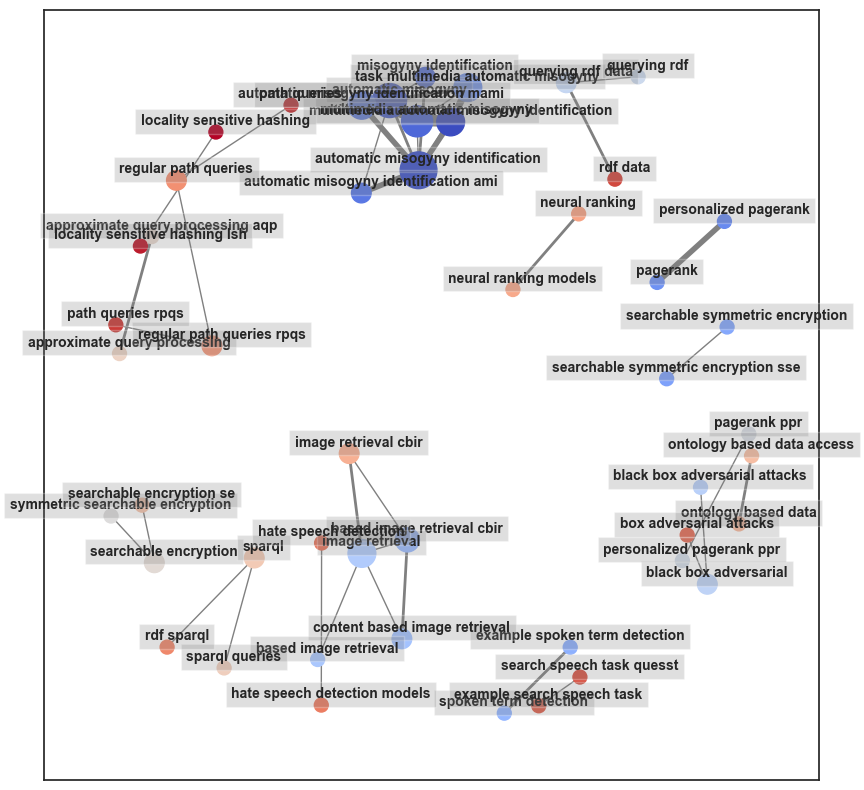

In [25]:
terms_b= df_cs['coupled_keywords'] 
bigrams_comp = list(chain.from_iterable(terms_b)) #list(itertools.chain(*terms_b))

# Create counter of words in clean bigrams
bigram_counts_comp = collections.Counter(bigrams_comp)

bigram_df_comp = pd.DataFrame(bigram_counts_comp.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df_comp.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=50)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=6,
                 width=[v * 1 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=10, weight='bold')
    
plt.savefig('images/keywords_co-occurrence_cs_2.png')
plt.show()

### Social Science

In [26]:
df_ss['keywords'] = df_ss['Abstract'].apply(extraction)
df_ss['coupled_keywords'] = df_ss['keywords'].apply(coupling_terms)

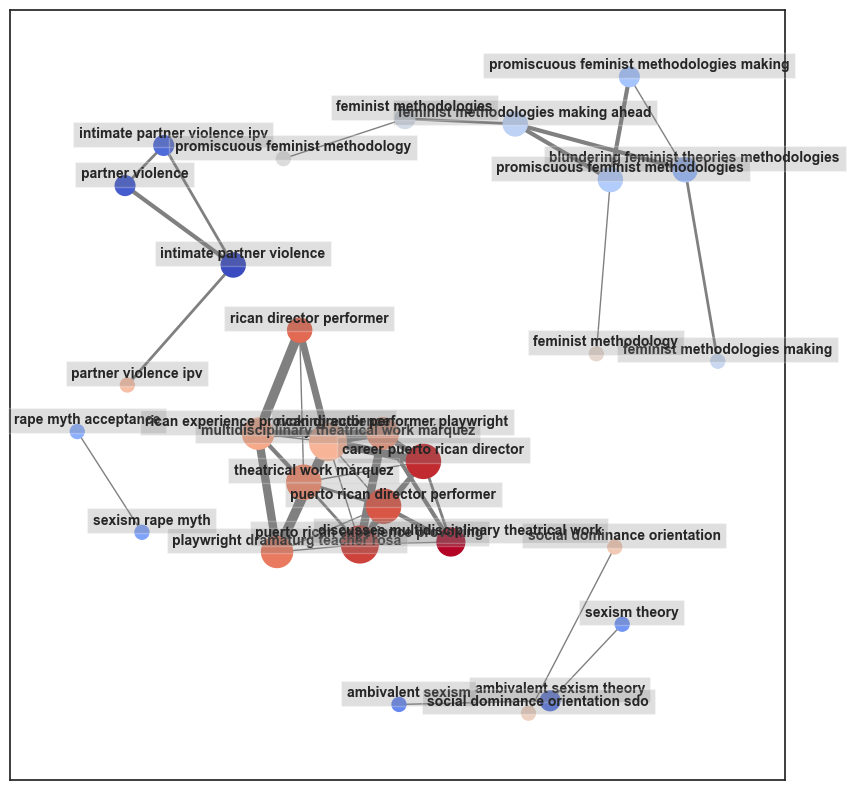

In [27]:
terms_soc= df_ss['coupled_keywords'] 
bigrams_soc = list(chain.from_iterable(terms_soc)) #list(itertools.chain(*terms_soc))

# Create counter of words in clean bigrams
bigram_counts_soc = collections.Counter(bigrams_soc)

bigram_df_soc = pd.DataFrame(bigram_counts_soc.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df_soc.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=100)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=[v * 1 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=10, weight='bold')
    
plt.savefig('images/keywords_co-occurrence_ss_2.png')
plt.show()

### Multidisciplinary

In [28]:
df_mult['keywords'] = df_mult['Abstract'].apply(extraction)
df_mult['coupled_keywords'] = df_mult['keywords'].apply(coupling_terms)

NameError: name 'df_mult' is not defined

In [ ]:
terms_mult= df_mult['coupled_keywords'] 
bigrams_mult = list(chain.from_iterable(terms_mult)) #list(itertools.chain(*terms_soc))

# Create counter of words in clean bigrams
bigram_counts_mult = collections.Counter(bigrams_mult)

bigram_df_mult = pd.DataFrame(bigram_counts_mult.most_common(50),
                             columns=['bigram', 'count'])

d = bigram_df_mult.set_index('bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    degree = dict(G.degree)

#G.add_node("sexism", weight=100)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)


fig, ax = plt.subplots(figsize=(10, 10))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=[v * 1 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 100 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.03, value[1]+.02
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=10, weight='bold')
    
plt.savefig('images/keywords_co-occurrence_mult.png')
plt.show()

### Co-authorship network

#### Computer Science

In [74]:
def auth_comb(string):
    words= string.split("; ")
    pairs = list(skipgrams(words, n=2, k=len(words)-1))
    return pairs

In [75]:
df_cs['paired_authors'] = df_cs['authors'].apply(auth_comb)
df_cs['paired_authors']

0       [(L. Chen, C. Lu), (L. Chen, S. Tang), (L. Che...
1       [(C. Basu, M. Singhal), (C. Basu, A. Dragan), ...
2       [(L. Gao, Z. Dai), (L. Gao, J. Callan), (Z. Da...
3                                  [(J. Pan, D. Manocha)]
4       [(K. Wang, Q. Yin), (K. Wang, W. Wang), (K. Wa...
                              ...                        
6069                          [(M. V. Rajee, C. Mythili)]
6070    [(M. Benito, E. Garcia-Portugues), (M. Benito,...
6071                     [(L. Abualigah, E. S. Hanandeh)]
6072                       [(E. Shushkevich, J. Cardiff)]
6073    [(M. Yang, H. Chang), (M. Yang, W. Luo), (M. Y...
Name: paired_authors, Length: 6074, dtype: object

In [76]:
# only keeping the rows with NO empty lists

data_paired_auth_cs = df_cs[df_cs['paired_authors'].map(lambda d: len(d)) > 0]

auth_term_bigram_cs = data_paired_auth_cs['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams_cs = list(chain.from_iterable(auth_term_bigram_cs))

# Create counter of words in clean bigrams
auth_bigram_counts_cs = collections.Counter(auth_bigrams_cs)

auth_bigram_counts_cs = auth_bigram_counts_cs.most_common(100)

#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth_cs = pd.DataFrame(auth_bigram_counts_cs,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth_cs

,auth_bigram,count
0,"(C. Macdonald, I. Ounis)",15
1,"(G. Li, J. Feng)",11
2,"(Y. Gao, G. Chen)",11
3,"(F. Goasdoué, I. Manolescu)",11
4,"(A. Kemper, T. Neumann)",11
...,...,...
95,"(K. Zeng, C. Zaniolo)",5
96,"(N. Papailiou, D. Tsoumakos)",5
97,"(N. Papailiou, N. Koziris)",5
98,"(D. Tsoumakos, N. Koziris)",5


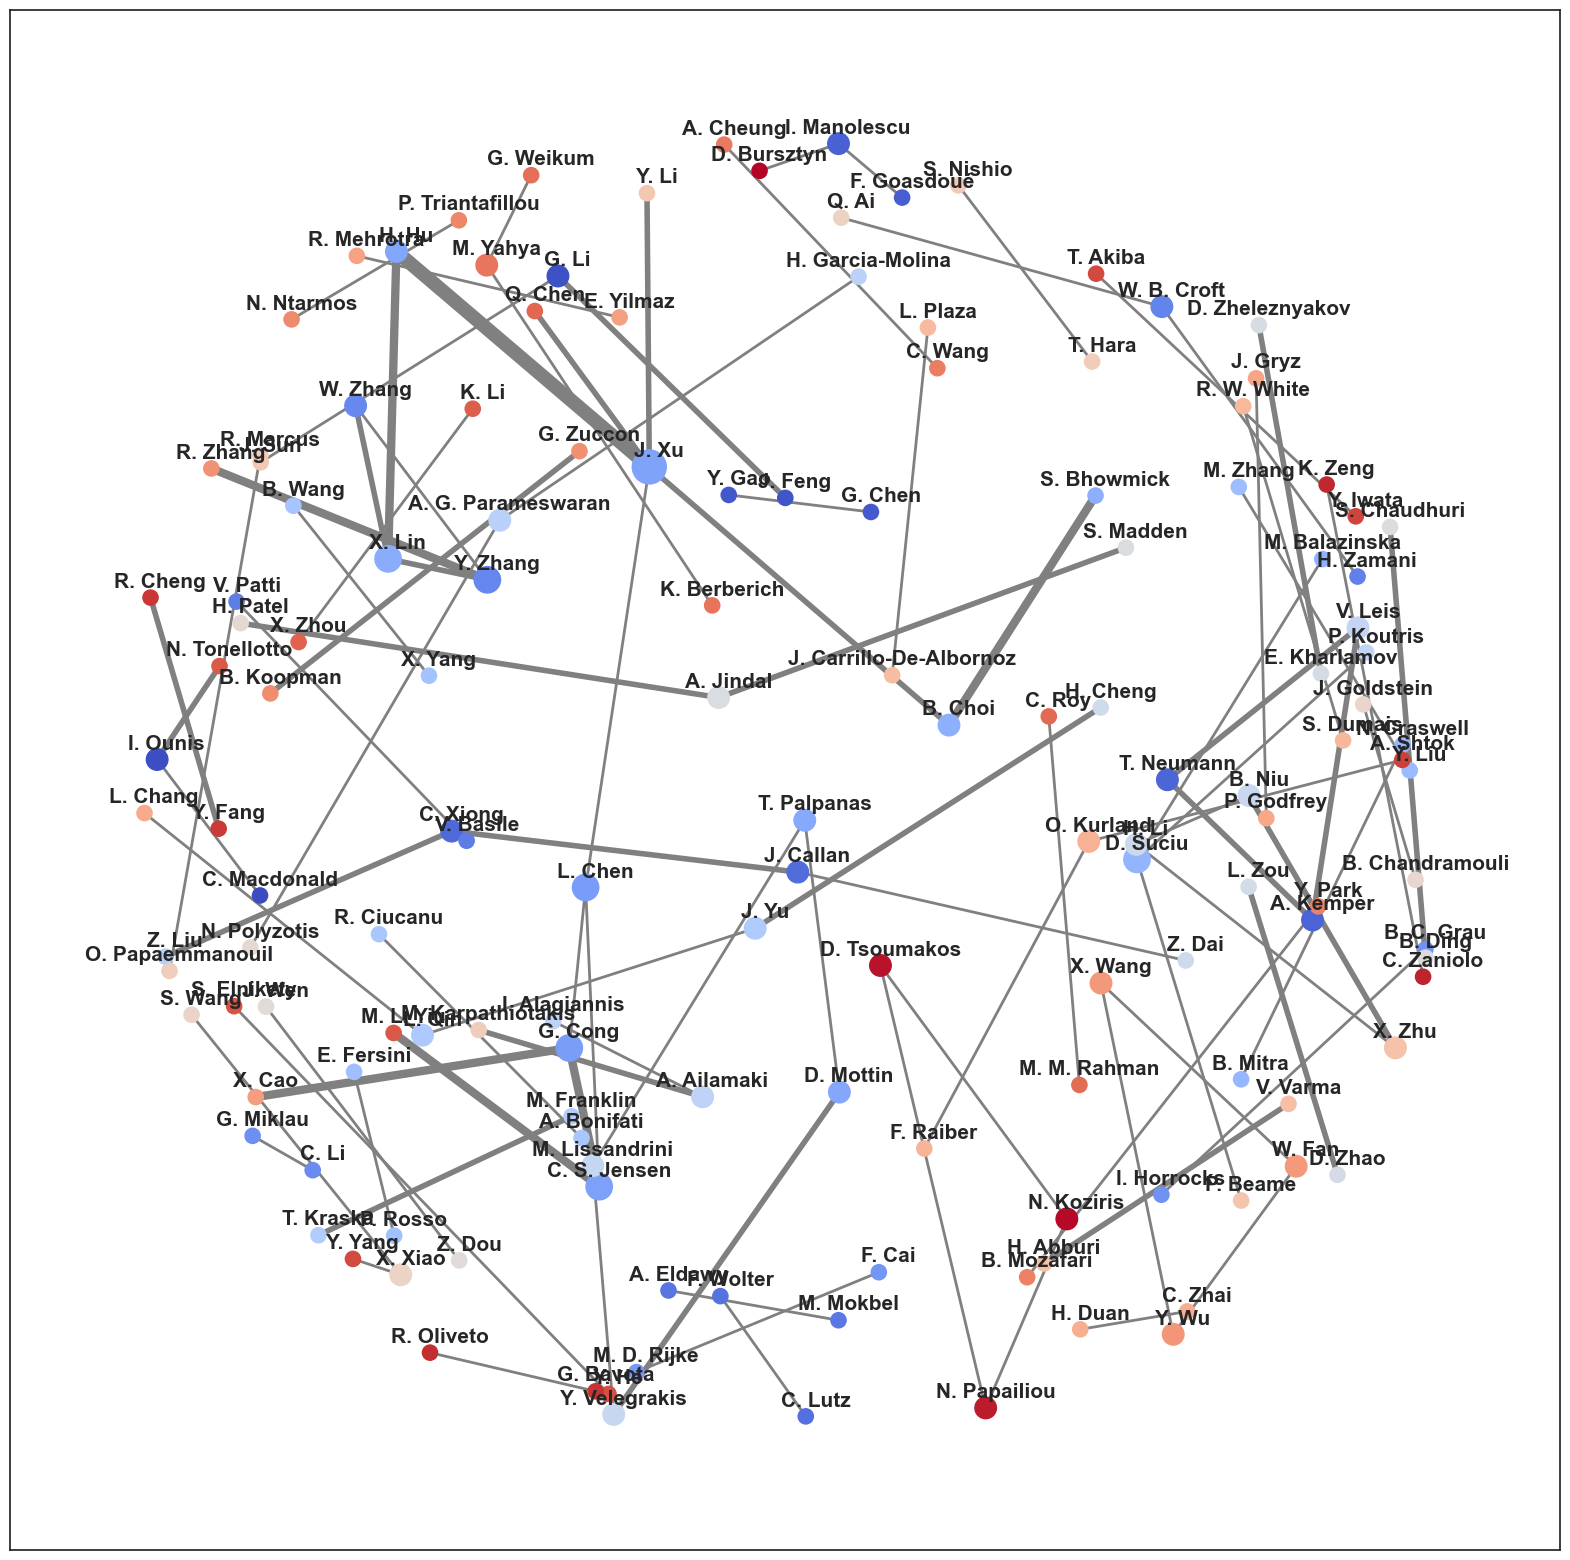

In [83]:
# Create dictionary of bigrams and their counts
d = data_paired_auth_cs.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=[v * 2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 120 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.savefig('images/authors_co-occurrence_cs.png')
plt.show()

#### Social Science

In [84]:
df_ss['paired_authors'] = df_ss['authors'].apply(auth_comb)
df_ss['paired_authors']

0       [(L. M. Brady, C. R. Kaiser), (L. M. Brady, B....
1                               [(S. Begun, N. E. Walls)]
2       [(E. C. Cassese, T. D. Barnes), (E. C. Cassese...
3       [(E. A. Leskinen, V. C. Rabelo), (E. A. Leskin...
4       [(P. Lemaster, J. Strough), (P. Lemaster, R. S...
                              ...                        
5609    [(P. Glick, M. Wilkerson), (P. Glick, M. Cuffe...
5610    [(S. Oram, H. Khalifeh), (S. Oram, L. M. Howar...
5611                                                   []
5612                         [(L. M. Young, M. M. Nauta)]
5613                          [(M. Barreto, N. Ellemers)]
Name: paired_authors, Length: 5614, dtype: object

In [85]:
# only keeping the rows with NO empty lists

data_paired_auth_ss = df_ss[df_ss['paired_authors'].map(lambda d: len(d)) > 0]

auth_term_bigram_ss = data_paired_auth_ss['paired_authors']
#auth_bigrams = list(itertools.chain(*auth_term_bigram))
auth_bigrams_ss = list(chain.from_iterable(auth_term_bigram_ss))

# Create counter of words in clean bigrams
auth_bigram_counts_ss = collections.Counter(auth_bigrams_ss)

auth_bigram_counts_ss = auth_bigram_counts_ss.most_common(100)

#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth_ss = pd.DataFrame(auth_bigram_counts_ss,
                             columns=['auth_bigram', 'count'])

#data_paired_auth = data_paired_auth.rename(columns={'index':'auth_bigram', 0:'count'})
data_paired_auth_ss

,auth_bigram,count
0,"(M. D. Hammond, N. C. Overall)",9
1,"(Y. Huang, C. G. Sibley)",6
2,"(E. J. Cross, N. C. Overall)",6
3,"(D. Osborne, C. G. Sibley)",5
4,"(M. Barreto, N. Ellemers)",5
...,...,...
95,"(K. Webster, A. Kaida)",3
96,"(V. Nicholson, S. Patterson)",3
97,"(B. C. Gutierrez, M. L. D. Halim)",3
98,"(S. Lelaurain, D. Fonte)",3


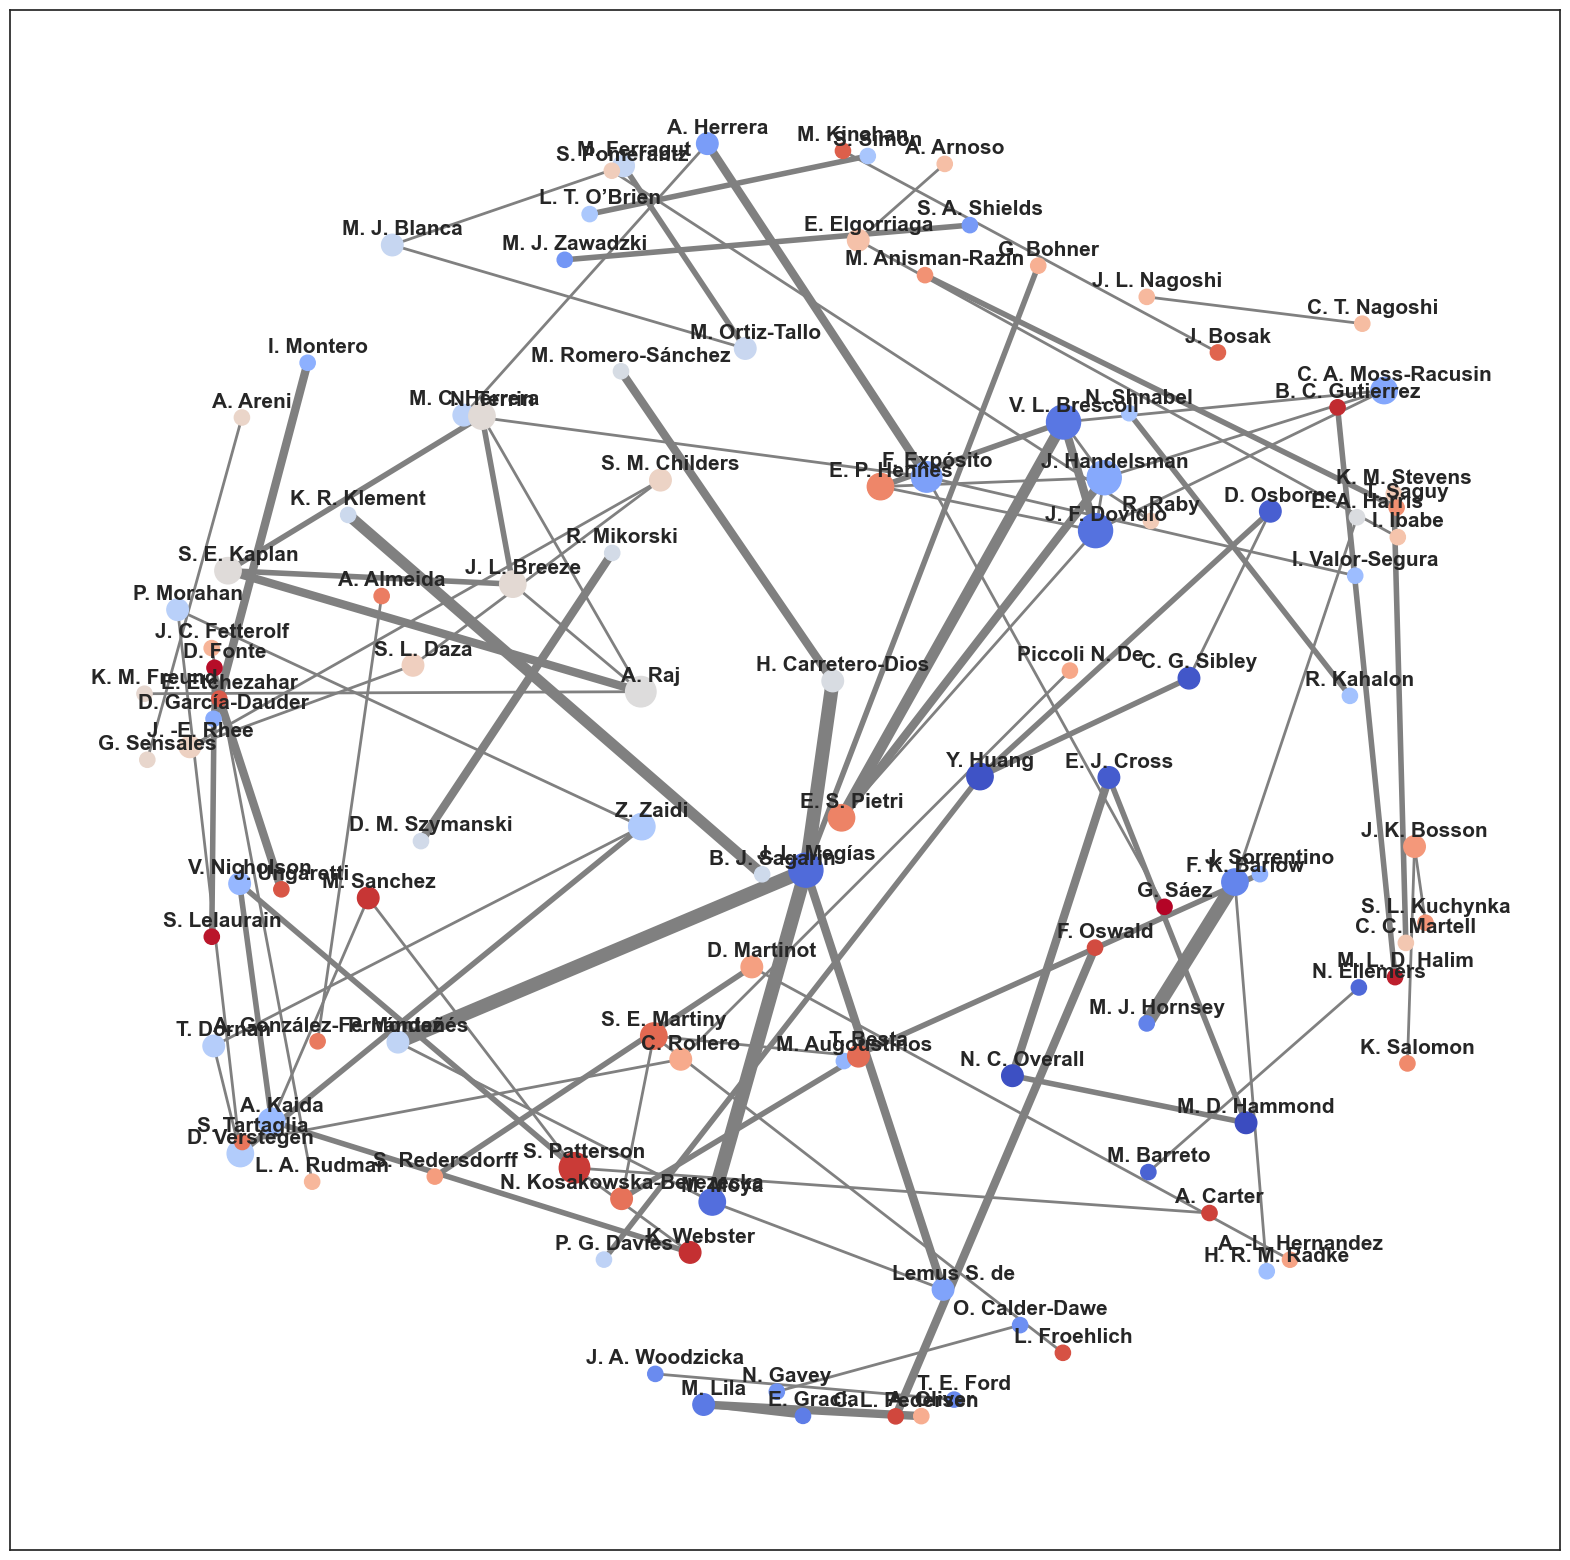

In [88]:
# Create dictionary of bigrams and their counts
d = data_paired_auth_ss.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=[v * 2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 120 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.savefig('images/authors_co-occurrence_ss.png')
plt.show()

#### Full dataset

In [90]:
df['paired_authors'] = df['authors'].apply(auth_comb)

data_paired_auth = df[df['paired_authors'].map(lambda d: len(d)) > 0]

auth_term_bigram = data_paired_auth['paired_authors']
auth_bigrams = list(chain.from_iterable(auth_term_bigram))

# Create counter of words in clean bigrams
auth_bigram_counts = collections.Counter(auth_bigrams)

auth_bigram_counts = auth_bigram_counts.most_common(100)

#data_paired_auth = pd.DataFrame.from_dict(auth_bigram_counts, orient='index').reset_index()
data_paired_auth = pd.DataFrame(auth_bigram_counts,
                             columns=['auth_bigram', 'count'])

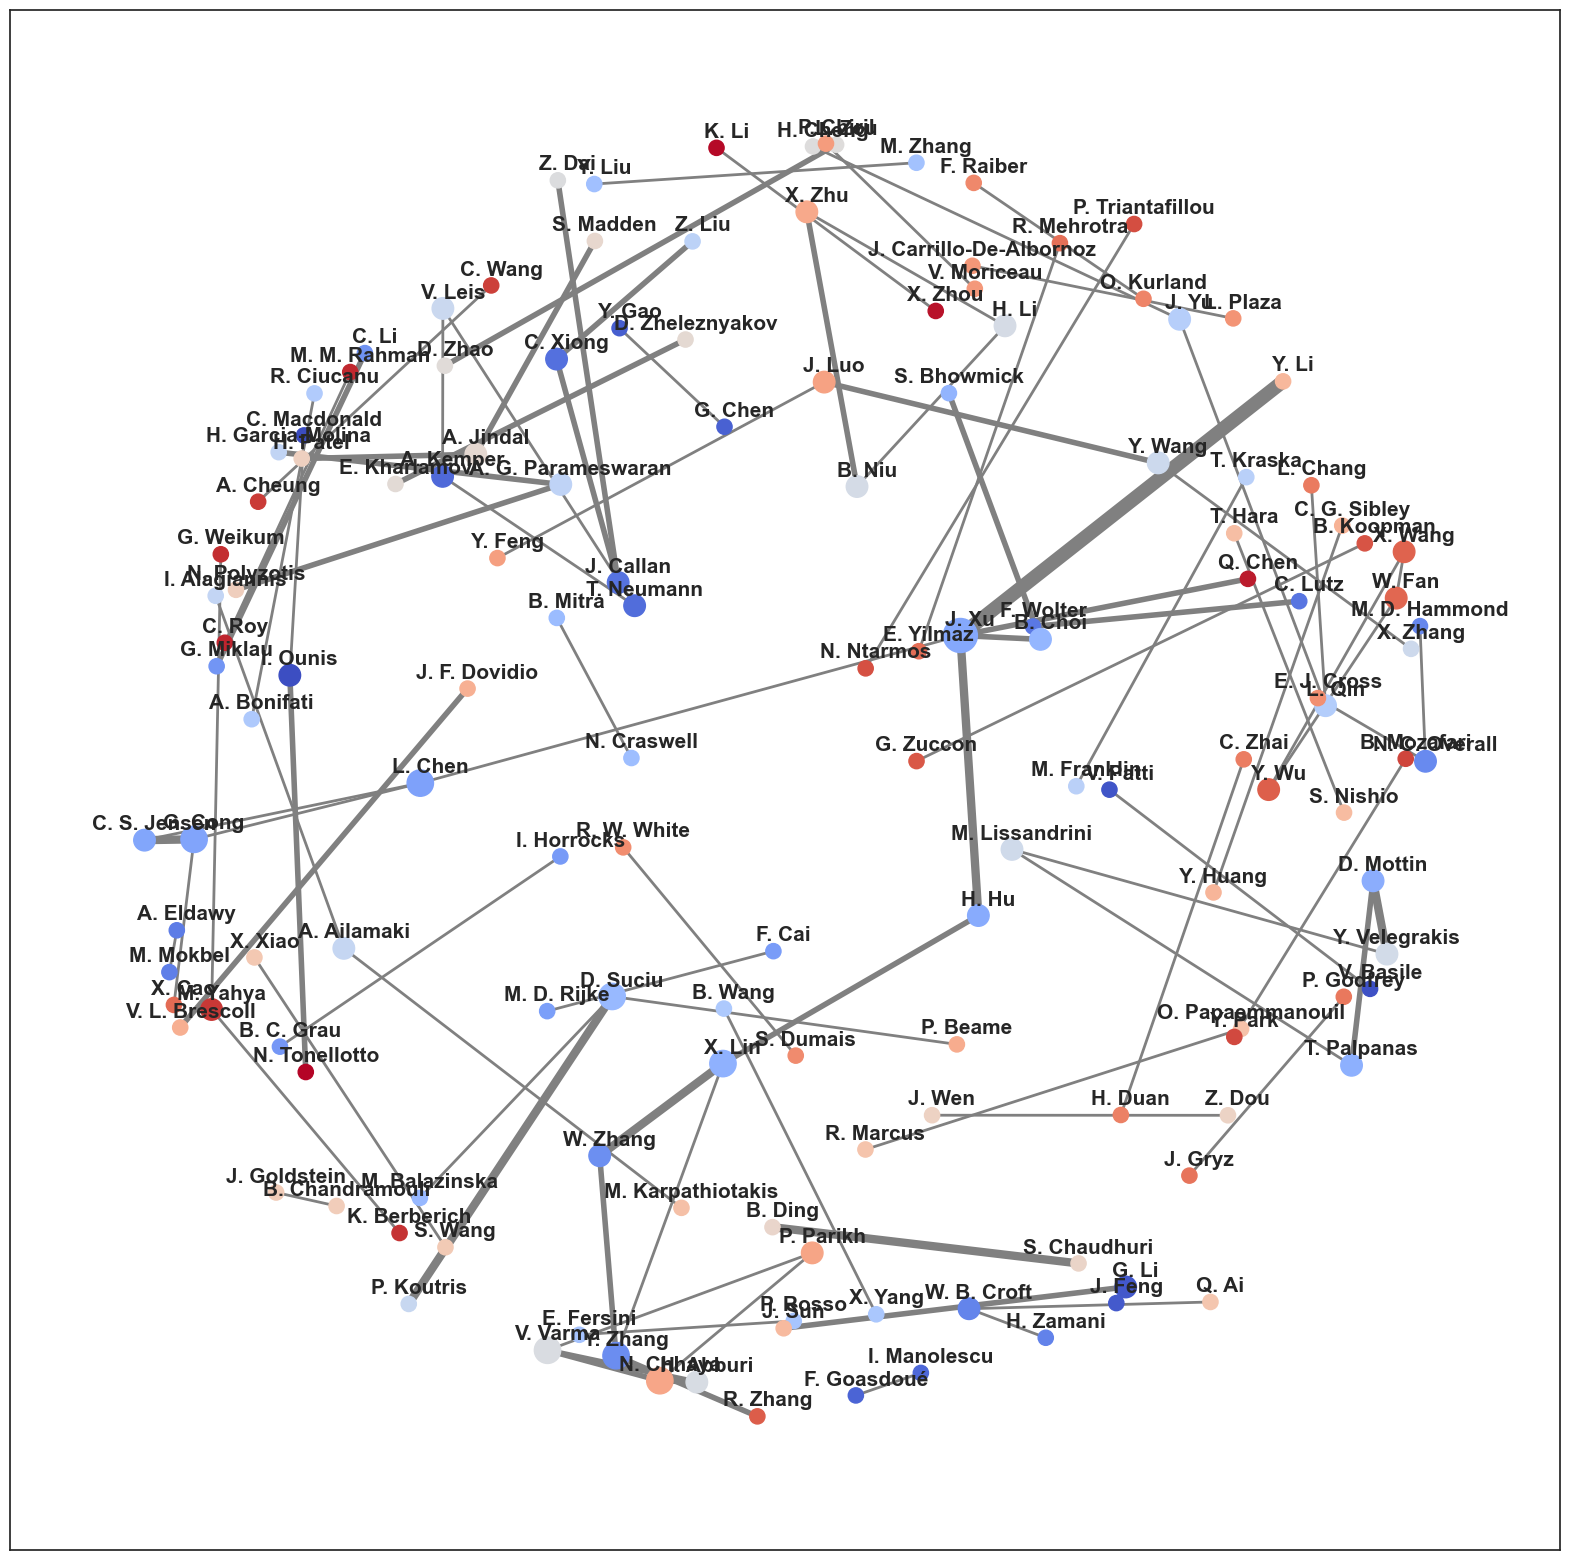

In [92]:
# Create dictionary of bigrams and their counts
d = data_paired_auth.set_index('auth_bigram').T.to_dict('records')

# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))
    # creating node size depending on node degree
    degree = dict(G.degree)

color_lookup = {k:v for v, k in enumerate(sorted(set(G.nodes())))}

low, *_, high = sorted(color_lookup.values())
norm = mpl.colors.Normalize(vmin=low, vmax=high, clip=True)
mapper = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.coolwarm)

fig, ax = plt.subplots(figsize=(20, 20))

pos = nx.spring_layout(G, k=2)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=15,
                 width=[v * 2 for v in degree.values()],
                 edge_color='grey',
                 node_color= [mapper.to_rgba(i) 
                    for i in color_lookup.values()],           #'purple',
                 nodelist=degree.keys(), node_size=[v * 120 for v in degree.values()],
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.015, value[1]+.015
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor='red', alpha=0.25),
            horizontalalignment='center', fontsize=15, weight='bold')

plt.savefig('images/authors_co-occurrence_full.png')
plt.show()